In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing

%matplotlib inline

In [11]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS-Final-PCA.xlsx'  

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data)
print "The file has:", np.size (Data), "data points."
print "*******************************************"

Data = Data.drop('Location', axis=1) 
#Data
X = Data.drop('label', axis=1)  
y = Data['label']
print X.head()
print y.head()

The file name is : WeatherAUS-Final-PCA.xlsx
The sheet's name is: Data
The matrix size is: (142193, 10)
The file has: 1421930 data points.
*******************************************
         P1        P2        P3        P4        P5        P6        P7  \
0  1.329162  1.089773  0.154372  1.386960 -0.077080  0.717266  0.698151   
1  1.201544 -0.165625  0.510448  2.212495 -0.873853 -0.776803  0.007917   
2  2.188099  0.833814  0.844096  1.261486  0.215900 -0.702896  0.469526   
3  0.827603 -2.096686  0.795512  1.560439  0.562138  0.032131  0.468624   
4  1.975079 -0.412035 -1.132834  0.913044 -1.073298  0.954810  0.153818   

         P8  
0 -0.844924  
1  0.085203  
2 -0.209797  
3  0.029683  
4 -0.279111  
0   -1
1   -1
2   -1
3   -1
4   -1
Name: label, dtype: int64


('Class -1:', 110316)
('Class 1:', 31877)
('Proportion:', 3.0, ': 1')


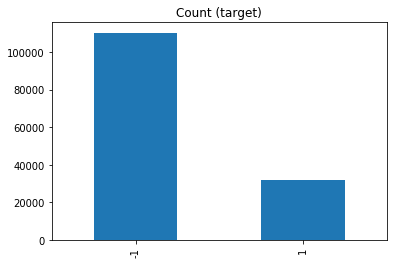

In [3]:
target_count = Data.label.value_counts()
print('Class -1:', target_count[-1])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[-1] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [4]:
# Class count
count_class_N, count_class_P = Data.label.value_counts()

# Divide by class
Class_N = Data[Data['label'] == -1]
Class_P = Data[Data['label'] == 1]
#print "Majority" 
#print Class_N
#print "Minority"
#print Class_P

Random under-sampling:
-1    31877
 1    31877
Name: label, dtype: int64


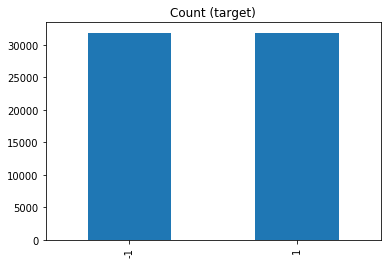

In [5]:
#Random under-sampling
Class_N_under = Class_N.sample(count_class_P)
Test_under = pd.concat([Class_N_under, Class_P], axis=0)

print('Random under-sampling:')
print(Test_under.label.value_counts())

Test_under.label.value_counts().plot(kind='bar', title='Count (target)')

Random over-sampling:
-1    110316
 1    110316
Name: label, dtype: int64


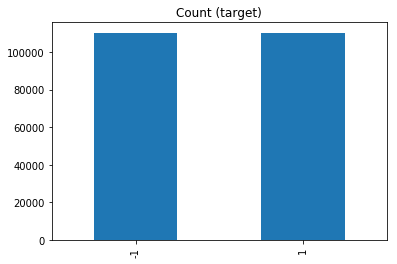

In [6]:
#Random over-sampling
Class_P_over = Class_P.sample(count_class_N, replace=True)
Test_over = pd.concat([Class_N, Class_P_over], axis=0)

print('Random over-sampling:')
print(Test_over.label.value_counts())

Test_over.label.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
#Random under-sampling and over-sampling with imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)
X_rus = pd.DataFrame(X_rus)
y_rus = pd.DataFrame(y_rus)

#print('Removed indexes:', id_rus)
#plot_2d_space(X_rus, y_rus, 'Random under-sampling')

X_rus.head()

,0,1,2,3,4,5,6,7
0,-2.923442,-1.100938,-0.228715,-0.029517,0.902957,-0.169108,0.260673,0.049321
1,0.182744,0.493470,1.209802,0.513082,0.128927,-0.901801,-0.260684,-0.473720
2,-0.036294,-0.354917,-1.359103,1.064374,-0.419985,0.278166,-0.193198,-0.552090
3,-1.118172,-0.214222,1.406648,-1.229279,0.139422,-0.668126,-0.091783,0.106054
4,3.258934,-2.038741,0.065928,-0.612282,-0.722568,-0.099476,-0.320370,-0.056233


In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
X_ros = pd.DataFrame(X_ros)
y_ros = pd.DataFrame(y_ros)

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')
#plot_2d_space(X_ros, y_ros, 'Random over-sampling')

X_ros.head()

,0,1,2,3,4,5,6,7
0,1.329162,1.089773,0.154372,1.386960,-0.077080,0.717266,0.698151,-0.844924
1,1.201544,-0.165625,0.510448,2.212495,-0.873853,-0.776803,0.007917,0.085203
2,2.188099,0.833814,0.844096,1.261486,0.215900,-0.702896,0.469526,-0.209797
3,0.827603,-2.096686,0.795512,1.560439,0.562138,0.032131,0.468624,0.029683
4,1.975079,-0.412035,-1.132834,0.913044,-1.073298,0.954810,0.153818,-0.279111


In [23]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)
X_tl = pd.DataFrame(X_tl)
y_tl = pd.DataFrame(y_tl)

#print('Removed indexes:', id_tl)
#plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

X_tl.head()

,0,1,2,3,4,5,6,7
0,1.329162,1.089773,0.154372,1.386960,-0.077080,0.717266,0.698151,-0.844924
1,1.201544,-0.165625,0.510448,2.212495,-0.873853,-0.776803,0.007917,0.085203
2,2.188099,0.833814,0.844096,1.261486,0.215900,-0.702896,0.469526,-0.209797
3,0.827603,-2.096686,0.795512,1.560439,0.562138,0.032131,0.468624,0.029683
4,1.975079,-0.412035,-1.132834,0.913044,-1.073298,0.954810,0.153818,-0.279111


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)
X_sm = pd.DataFrame(X_sm)
y_sm = pd.DataFrame(y_sm)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
X_sm.head()

,0,1,2,3,4,5,6,7
0,1.329162,1.089773,0.154372,1.386960,-0.077080,0.717266,0.698151,-0.844924
1,1.201544,-0.165625,0.510448,2.212495,-0.873853,-0.776803,0.007917,0.085203
2,2.188099,0.833814,0.844096,1.261486,0.215900,-0.702896,0.469526,-0.209797
3,0.827603,-2.096686,0.795512,1.560439,0.562138,0.032131,0.468624,0.029683
4,1.975079,-0.412035,-1.132834,0.913044,-1.073298,0.954810,0.153818,-0.279111


In [29]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)
X_smt= pd.DataFrame(X_smt)
y_smt = pd.DataFrame(y_smt)

#plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')
X_smt.head()

,0,1,2,3,4,5,6,7
0,1.329162,1.089773,0.154372,1.386960,-0.077080,0.717266,0.698151,-0.844924
1,1.201544,-0.165625,0.510448,2.212495,-0.873853,-0.776803,0.007917,0.085203
2,2.188099,0.833814,0.844096,1.261486,0.215900,-0.702896,0.469526,-0.209797
3,0.827603,-2.096686,0.795512,1.560439,0.562138,0.032131,0.468624,0.029683
4,1.975079,-0.412035,-1.132834,0.913044,-1.073298,0.954810,0.153818,-0.279111


In [30]:
X = X_sm
y = y_sm

In [31]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

#P stands for Primary sets 
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size = 0.20) 

In [33]:
X_train = X_train_p
X_test = X_test_p
y_train = y_train_p
y_test = y_test_p 

X_train = pd.DataFrame(X_train)
#Adding name for the columns
X_train.columns =  ['P1', 'P2','P3','P4','P5','P6','P7','P8']

X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)                            
print X_train.shape
print "Training data"
#print X_train.head()

X_test = pd.DataFrame(X_test)
X_test.columns =  ['P1', 'P2','P3','P4','P5','P6','P7','P8']

X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)                             
print X_test.shape
print "Test data"
#print X_test.head()

(176505, 8)
Training data
(44127, 8)
Test data


In [34]:
#Gaussian Kernel

from sklearn.svm import SVC  

svclassifier = SVC(kernel='rbf', C= 10, gamma = 0.1 )   
svclassifier.fit(X_train, y_train) 

#Making predictions
y_pred = svclassifier.predict(X_test) 

C:\Users\Mantre\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


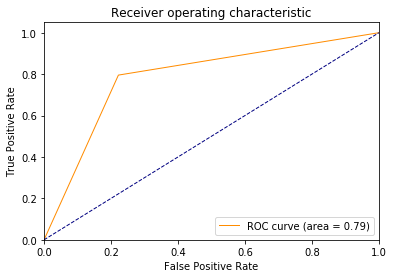

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Model Accuracy: how often is the classifier correct?
SVM_RBF_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
SVM_RBF_test_precision = metrics.precision_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
SVM_RBF_test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
SVM_RBF_test_f1 = F1
print ('F-Measure:', F1)

#Model G-mean
SVM_RBF_test_Gmean = geometric_mean_score(y_test, y_pred)
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures  
are the most commonly used metrics for classification tasks"""

target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm_SVC_RBF = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm_SVC_RBF, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

NameError: name 'metrics' is not defined